In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("y0ussefkandil/bmw-sales2010-2024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bmw-sales2010-2024' dataset.
Path to dataset files: /kaggle/input/bmw-sales2010-2024


In [ ]:
import kagglehub
path = kagglehub.dataset_download("y0ussefkandil/bmw-sales2010-2024")
print(path)


Using Colab cache for faster access to the 'bmw-sales2010-2024' dataset.
/kaggle/input/bmw-sales2010-2024



EXAMPLE 1: BASIC PATTERN ASSOCIATION

Creating simple binary patterns...
Pattern matrix shape: (3, 16)
Number of patterns: 3
Pattern size: 16

Training Hebbian Network on patterns...
Epoch 20/50 - Mean Activation: 1.0000
Epoch 40/50 - Mean Activation: 1.0000

Training complete! Final weight matrix shape: (16, 3)

Testing network on learned patterns:
Pattern 1 -> Output: [ 1. -1.  1.]
Pattern 2 -> Output: [ 1. -1.  1.]
Pattern 3 -> Output: [ 1. -1.  1.]

EXAMPLE 2: FEATURE EXTRACTION WITH IRIS DATASET

Loading Iris dataset...
Dataset shape: (150, 4)
Number of samples: 150
Number of features: 4

Training Hebbian Network for feature extraction...
Epoch 20/100 - Mean Activation: 0.9964
Epoch 40/100 - Mean Activation: 0.9974
Epoch 60/100 - Mean Activation: 0.9968
Epoch 80/100 - Mean Activation: 0.9997
Epoch 100/100 - Mean Activation: 1.0000

Training complete! Final weight matrix shape: (4, 2)

Extracted features shape: (150, 2)

EXAMPLE 3: OJA'S RULE FOR PRINCIPAL COMPONENT ANALYSIS

Trai

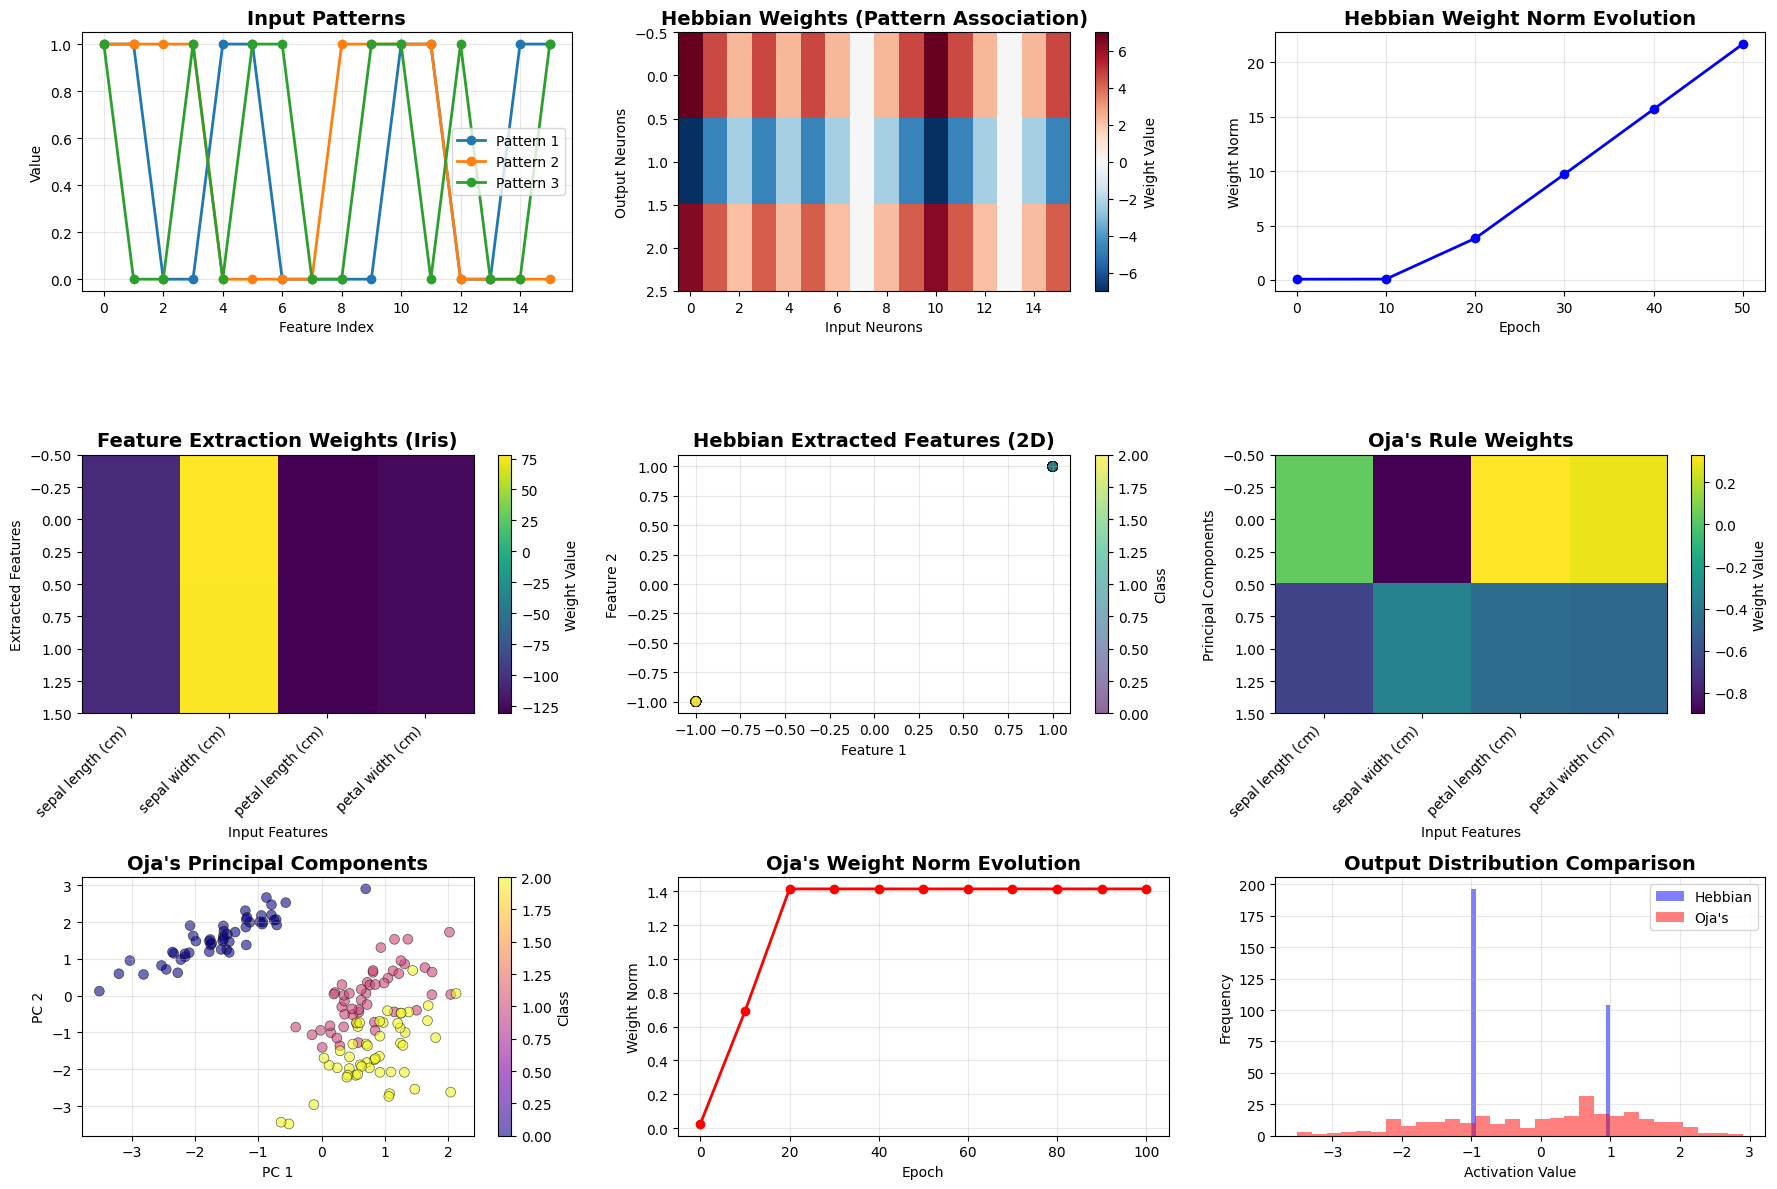


Key Results:
  - Hebbian network learned 3 patterns
  - Feature extraction: 4D -> 2D
  - Oja's rule extracted 2 principal components
  - Final Hebbian weight norm: 27.0787
  - Final Oja weight norm: 1.4148

All done! Check the visualization above.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


class HebbianNetwork:


    def __init__(self, input_size, output_size, learning_rate=0.01):

        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros(output_size)


        self.weight_history = [self.weights.copy()]

    def activate(self, x):

        return np.tanh(x)

    def forward(self, X):

        z = np.dot(X, self.weights) + self.bias
        return self.activate(z)

    def hebbian_update(self, x, y):


        delta_w = self.learning_rate * np.outer(x, y)
        self.weights += delta_w
        self.bias += self.learning_rate * y

    def train(self, X, epochs=100, verbose=True):

        n_samples = X.shape[0]

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]

            for i, x in enumerate(X_shuffled):
                # Forward pass
                y = self.forward(x.reshape(1, -1)).flatten()

                # Hebbian update
                self.hebbian_update(x, y)

            # Store weights for visualization
            if epoch % 10 == 0:
                self.weight_history.append(self.weights.copy())

            # Print progress
            if verbose and (epoch + 1) % 20 == 0:
                output = self.forward(X)
                mean_activation = np.mean(np.abs(output))
                print(f"Epoch {epoch + 1}/{epochs} - Mean Activation: {mean_activation:.4f}")

        print(f"\nTraining complete! Final weight matrix shape: {self.weights.shape}")

# Oja's Rule (Normalized Hebbian Learning)
class OjaNetwork:
    """
    Oja's Learning Rule - Normalized Hebbian Learning

    Prevents weight explosion by adding a normalization term:
    Delta_w = learning_rate * (x * y - y^2 * w)
    """

    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.weight_history = [self.weights.copy()]

    def forward(self, X):
        return np.dot(X, self.weights)

    def oja_update(self, x, y):
        """
        Oja's learning rule with weight normalization
        """
        # Oja's rule: Delta_w = lr * (x * y - y^2 * w)
        delta_w = self.learning_rate * (np.outer(x, y) - np.outer(self.weights @ y, y))
        self.weights += delta_w

    def train(self, X, epochs=100, verbose=True):
        n_samples = X.shape[0]

        for epoch in range(epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]

            for x in X_shuffled:
                y = self.forward(x.reshape(1, -1)).flatten()
                self.oja_update(x, y)

            if epoch % 10 == 0:
                self.weight_history.append(self.weights.copy())

            if verbose and (epoch + 1) % 20 == 0:
                weight_norm = np.linalg.norm(self.weights)
                print(f"Epoch {epoch + 1}/{epochs} - Weight Norm: {weight_norm:.4f}")

        print(f"\nOja's training complete! Final weight norm: {np.linalg.norm(self.weights):.4f}")

# Example 1: Basic Pattern Association
print("\n" + "=" * 80)
print("EXAMPLE 1: BASIC PATTERN ASSOCIATION")
print("=" * 80)

print("\nCreating simple binary patterns...")
# Create simple patterns (4x4 images)
patterns = np.array([
    [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],  # Pattern 1: Vertical stripes
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],  # Pattern 2: Horizontal stripes
    [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],  # Pattern 3: Diagonal
])

print(f"Pattern matrix shape: {patterns.shape}")
print(f"Number of patterns: {patterns.shape[0]}")
print(f"Pattern size: {patterns.shape[1]}")

# Train Hebbian network
print("\nTraining Hebbian Network on patterns...")
hebb_net = HebbianNetwork(input_size=16, output_size=3, learning_rate=0.05)
hebb_net.train(patterns, epochs=50, verbose=True)

# Test the network
print("\nTesting network on learned patterns:")
outputs = hebb_net.forward(patterns)
for i, output in enumerate(outputs):
    print(f"Pattern {i+1} -> Output: {output}")

# Example 2: Feature Extraction with Real Data
print("\n" + "=" * 80)
print("EXAMPLE 2: FEATURE EXTRACTION WITH IRIS DATASET")
print("=" * 80)

# Load Iris dataset
print("\nLoading Iris dataset...")
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset shape: {X_scaled.shape}")
print(f"Number of samples: {X_scaled.shape[0]}")
print(f"Number of features: {X_scaled.shape[1]}")

# Train Hebbian network for feature extraction
print("\nTraining Hebbian Network for feature extraction...")
feature_net = HebbianNetwork(input_size=4, output_size=2, learning_rate=0.01)
feature_net.train(X_scaled, epochs=100, verbose=True)

# Extract features
features = feature_net.forward(X_scaled)
print(f"\nExtracted features shape: {features.shape}")

# Example 3: Oja's Rule for Principal Component
print("\n" + "=" * 80)
print("EXAMPLE 3: OJA'S RULE FOR PRINCIPAL COMPONENT ANALYSIS")
print("=" * 80)

print("\nTraining Oja's Network (normalized Hebbian learning)...")
oja_net = OjaNetwork(input_size=4, output_size=2, learning_rate=0.01)
oja_net.train(X_scaled, epochs=100, verbose=True)

# Extract principal components
principal_components = oja_net.forward(X_scaled)
print(f"\nPrincipal components shape: {principal_components.shape}")

# Visualization
print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))

# 1. Pattern Visualization
ax1 = plt.subplot(3, 3, 1)
for i, pattern in enumerate(patterns):
    ax1.plot(pattern, label=f'Pattern {i+1}', linewidth=2, marker='o')
ax1.set_title('Input Patterns', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature Index')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Hebbian Weight Matrix
ax2 = plt.subplot(3, 3, 2)
im2 = ax2.imshow(hebb_net.weights.T, cmap='RdBu_r', aspect='auto')
ax2.set_title('Hebbian Weights (Pattern Association)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Input Neurons')
ax2.set_ylabel('Output Neurons')
plt.colorbar(im2, ax=ax2, label='Weight Value')

# 3. Weight Evolution (Hebbian)
ax3 = plt.subplot(3, 3, 3)
weight_norms = [np.linalg.norm(w) for w in hebb_net.weight_history]
ax3.plot(range(0, len(weight_norms) * 10, 10), weight_norms, 'b-o', linewidth=2)
ax3.set_title('Hebbian Weight Norm Evolution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Weight Norm')
ax3.grid(True, alpha=0.3)

# 4. Feature Extraction Weights
ax4 = plt.subplot(3, 3, 4)
im4 = ax4.imshow(feature_net.weights.T, cmap='viridis', aspect='auto')
ax4.set_title('Feature Extraction Weights (Iris)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Input Features')
ax4.set_ylabel('Extracted Features')
ax4.set_xticks(range(4))
ax4.set_xticklabels(iris.feature_names, rotation=45, ha='right')
plt.colorbar(im4, ax=ax4, label='Weight Value')

# 5. Extracted Features Scatter
ax5 = plt.subplot(3, 3, 5)
scatter = ax5.scatter(features[:, 0], features[:, 1], c=y, cmap='viridis',
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax5.set_title('Hebbian Extracted Features (2D)', fontsize=14, fontweight='bold')
ax5.set_xlabel('Feature 1')
ax5.set_ylabel('Feature 2')
plt.colorbar(scatter, ax=ax5, label='Class')
ax5.grid(True, alpha=0.3)

# 6. Oja's Weight Matrix
ax6 = plt.subplot(3, 3, 6)
im6 = ax6.imshow(oja_net.weights.T, cmap='viridis', aspect='auto')
ax6.set_title("Oja's Rule Weights", fontsize=14, fontweight='bold')
ax6.set_xlabel('Input Features')
ax6.set_ylabel('Principal Components')
ax6.set_xticks(range(4))
ax6.set_xticklabels(iris.feature_names, rotation=45, ha='right')
plt.colorbar(im6, ax=ax6, label='Weight Value')

# 7. Oja's Principal Components
ax7 = plt.subplot(3, 3, 7)
scatter = ax7.scatter(principal_components[:, 0], principal_components[:, 1],
                     c=y, cmap='plasma', s=50, alpha=0.6,
                     edgecolors='black', linewidth=0.5)
ax7.set_title("Oja's Principal Components", fontsize=14, fontweight='bold')
ax7.set_xlabel('PC 1')
ax7.set_ylabel('PC 2')
plt.colorbar(scatter, ax=ax7, label='Class')
ax7.grid(True, alpha=0.3)

# 8. Weight Norm Evolution (Oja)
ax8 = plt.subplot(3, 3, 8)
oja_norms = [np.linalg.norm(w) for w in oja_net.weight_history]
ax8.plot(range(0, len(oja_norms) * 10, 10), oja_norms, 'r-o', linewidth=2)
ax8.set_title("Oja's Weight Norm Evolution", fontsize=14, fontweight='bold')
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Weight Norm')
ax8.grid(True, alpha=0.3)

# 9. Comparison of activations
ax9 = plt.subplot(3, 3, 9)
ax9.hist(features.flatten(), bins=30, alpha=0.5, label='Hebbian', color='blue')
ax9.hist(principal_components.flatten(), bins=30, alpha=0.5, label="Oja's", color='red')
ax9.set_title('Output Distribution Comparison', fontsize=14, fontweight='bold')
ax9.set_xlabel('Activation Value')
ax9.set_ylabel('Frequency')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('hebbian_learning_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Results:")
print(f"  - Hebbian network learned {patterns.shape[0]} patterns")
print(f"  - Feature extraction: {X_scaled.shape[1]}D -> {features.shape[1]}D")
print(f"  - Oja's rule extracted {principal_components.shape[1]} principal components")
print(f"  - Final Hebbian weight norm: {np.linalg.norm(hebb_net.weights):.4f}")
print(f"  - Final Oja weight norm: {np.linalg.norm(oja_net.weights):.4f}")
